In [28]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [29]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
file_path = 'Resources/crypto_market_data.csv'
market_data_df = pd.read_csv(file_path, index_col="coin_id")

# Display the first 10 rows of the data
sample_data = market_data_df.head(10)
print(sample_data)


                 price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                    
bitcoin                              1.08388                     7.60278   
ethereum                             0.22392                    10.38134   
tether                              -0.21173                     0.04935   
ripple                              -0.37819                    -0.60926   
bitcoin-cash                         2.90585                    17.09717   
binancecoin                          2.10423                    12.85511   
chainlink                           -0.23935                    20.69459   
cardano                              0.00322                    13.99302   
litecoin                            -0.06341                     6.60221   
bitcoin-cash-sv                      0.92530                     3.29641   

                 price_change_percentage_14d  price_change_percentage_30d  \
coin_id   

In [30]:
# Generate summary statistics
summary_statistics = market_data_df.describe()

sample_data, summary_statistics

(                 price_change_percentage_24h  price_change_percentage_7d  \
 coin_id                                                                    
 bitcoin                              1.08388                     7.60278   
 ethereum                             0.22392                    10.38134   
 tether                              -0.21173                     0.04935   
 ripple                              -0.37819                    -0.60926   
 bitcoin-cash                         2.90585                    17.09717   
 binancecoin                          2.10423                    12.85511   
 chainlink                           -0.23935                    20.69459   
 cardano                              0.00322                    13.99302   
 litecoin                            -0.06341                     6.60221   
 bitcoin-cash-sv                      0.92530                     3.29641   
 
                  price_change_percentage_14d  price_change_percentage_30d

### Prepare the Data

In [31]:
# Use the `StandardScaler()` to normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)

In [32]:
# Create a DataFrame with the scaled data
# Copy the crypto names from the original data
# Set the coinid column as index
scaled_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)

# Display sample data from the scaled DataFrame
scaled_sample_data = scaled_data_df.head(10)
scaled_sample_data



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351


### Find the Best Value for k Using the Original Scaled DataFrame.

In [33]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 12)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for k in k_values:
    model = KMeans(n_clusters=k, random_state=0, n_init=10)
    model.fit(scaled_data_df)
    inertia.append(model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df


,k,inertia
0,1,287.000000
1,2,198.571818
2,3,123.190482
3,4,79.022435
4,5,65.302379
5,6,52.101806
6,7,46.035250
7,8,37.284807
8,9,32.161417
9,10,28.075253


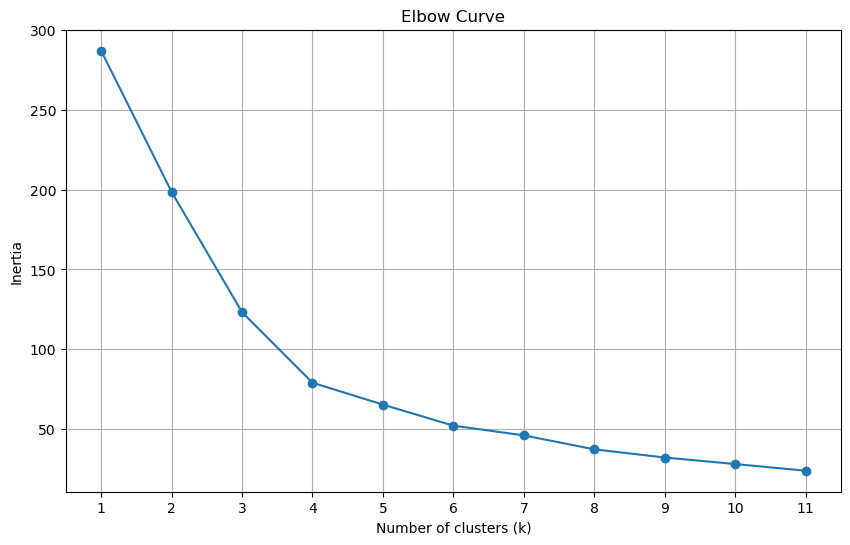

In [34]:
import matplotlib.pyplot as plt
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** k = 4

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [35]:
# Initialize the K-Means model using the best value for k
k = 4
kmeans_model = KMeans(n_clusters=k, random_state=0, n_init=10)

In [36]:
# Fit the K-Means model using the scaled data
kmeans_model.fit(scaled_data_df)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [37]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans_model.predict(scaled_data_df)

# View the resulting array of cluster values.
print(clusters)


[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [38]:
# Create a copy of the DataFrame
clustered_data_df = scaled_data_df.copy()

In [39]:
# Add a new column to the DataFrame with the predicted clusters
clustered_data_df['Cluster'] = clusters

# Display sample data
clustered_sample_data = clustered_data_df.head(10)
clustered_sample_data


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,2
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,2
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,2
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,2


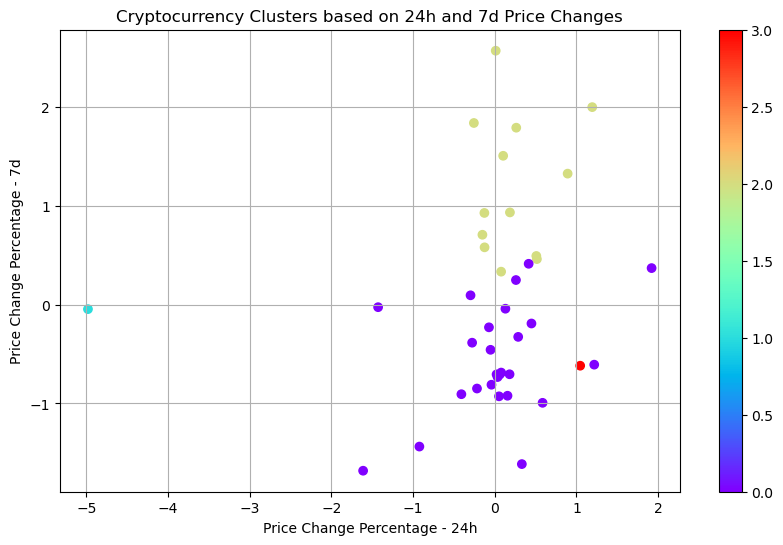

In [40]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
plt.figure(figsize=(10, 6))
scatter = plt.scatter(clustered_data_df['price_change_percentage_24h'], 
                      clustered_data_df['price_change_percentage_7d'], 
                      c=clustered_data_df['Cluster'], 
                      cmap='rainbow')
plt.title('Cryptocurrency Clusters based on 24h and 7d Price Changes')
plt.xlabel('Price Change Percentage - 24h')
plt.ylabel('Price Change Percentage - 7d')
plt.colorbar(scatter)
plt.grid(True)
plt.show()




### Optimize Clusters with Principal Component Analysis.

In [41]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [42]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_data_df)

# View the first five rows of the DataFrame. 
pca_sample_data = pd.DataFrame(pca_data).head()


In [43]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_

pca_sample_data, explained_variance

(          0         1         2
 0 -0.600667  0.842760  0.461595
 1 -0.458261  0.458466  0.952877
 2 -0.433070 -0.168126 -0.641752
 3 -0.471835 -0.222660 -0.479053
 4 -1.157800  2.041209  1.859715,
 array([0.3719856 , 0.34700813, 0.17603793]))

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance of these three components is approximately 87.60%. This means that these three components capture most of the variability in the data.

In [44]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index
pca_data_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2', 'PCA3'], index=market_data_df.index)


# Display sample data
pca_data_df.head(10)


,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715
binancecoin,-0.516534,1.388377,0.804071
chainlink,-0.450711,0.517699,2.846143
cardano,-0.345600,0.729439,1.478013
litecoin,-0.649468,0.432165,0.600303


### Find the Best Value for k Using the PCA Data

In [45]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values_pca = range(1, 12)

# Create an empty list to store the inertia values
inertia_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list
for k in k_values_pca:
    model_pca = KMeans(n_clusters=k, random_state=0, n_init=10)
    model_pca.fit(pca_data_df)
    inertia_pca.append(model_pca.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {'k': k_values_pca, 'inertia': inertia_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)

# Display the DataFrame
elbow_df_pca


,k,inertia
0,1,256.874086
1,2,168.811896
2,3,93.774626
3,4,49.665497
4,5,37.839466
5,6,27.720626
6,7,21.182776
7,8,17.016962
8,9,13.668325
9,10,10.484890


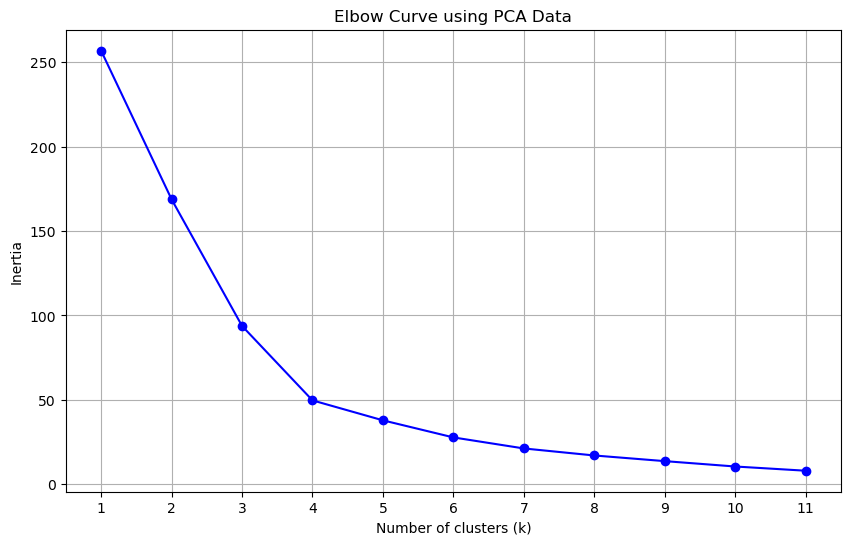

In [46]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df_pca['k'], elbow_df_pca['inertia'], marker='o', color='blue')
plt.title('Elbow Curve using PCA Data')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values_pca)
plt.grid(True)
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** k=4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [58]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=4, random_state=0, n_init=10)


In [59]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_data_df)

KMeans(n_clusters=4, n_init=10, random_state=0)

In [60]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_pca.predict(pca_data_df)

# Print the resulting array of cluster values.
print(clusters_pca)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [61]:
# Create a copy of the DataFrame with the PCA data
clustered_pca_df = pca_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_pca_df['Cluster'] = clusters_pca

# Display sample data
clustered_pca_sample_data = clustered_pca_df.head(10)
clustered_pca_sample_data


,PCA1,PCA2,PCA3,Cluster
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2
binancecoin,-0.516534,1.388377,0.804071,2
chainlink,-0.450711,0.517699,2.846143,2
cardano,-0.345600,0.729439,1.478013,2
litecoin,-0.649468,0.432165,0.600303,2


In [62]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
import hvplot.pandas
clustered_pca_df.hvplot.scatter(x="PCA1", y="PCA2", by="Cluster", hover_cols=["coin_id"])


:NdOverlay   [Cluster]
   :Scatter   [PCA1]   (PCA2,coin_id)

### Determine the Weights of Each Feature on each Principal Component

In [63]:
# Use the columns from the original scaled DataFrame as the index.
component_weights = pd.DataFrame(pca.components_, columns=scaled_data_df.columns, index=[f'PC{i+1}' for i in range(3)])

component_weights

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PC1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PC2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PC3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
**PC1 (Principal Component 1):**

Strongest positive influence: price_change_percentage_200d and price_change_percentage_1y.

Strongest negative influence: price_change_percentage_24h.

**PC2 (Principal Component 2):**

Strongest positive influence: price_change_percentage_30d and price_change_percentage_14d.

Strongest negative influence: price_change_percentage_1y.

**PC3 (Principal Component 3):**

Strongest positive influence: price_change_percentage_7d.

Strongest negative influence: price_change_percentage_60d.
    